In [424]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [425]:
df = pd. read_pickle('../input/dataset/Dataset.pkl') 

In [426]:
df

{'LabAnalysis':     %Time  irr_PH  irr_EC  irr_NH4  irr_K  irr_Na  irr_Ca  irr_Mg  irr_Si  \
 0   43836     5.3     4.3     1.10   15.2     0.3     9.6     4.9   0.090   
 1   43850     5.2     4.0     1.10   11.3     0.3     9.8     4.1   0.090   
 2   43864     4.8     3.9     1.30   11.6     0.3    10.2     3.5   0.090   
 3   43879     4.8     3.7     1.40   13.3     0.4     8.2     2.8   0.090   
 4   43893     4.7     3.5     1.10   11.3     0.4     7.6     2.5   0.010   
 5   43908     5.4     3.4     1.30   13.4     0.3     6.5     1.9   0.009   
 6   43921     5.6     3.1     1.20   11.0     0.2     5.6     2.0   0.009   
 7   43936     5.7     2.9     1.20    9.3     0.3     6.4     2.7   0.009   
 8   43951     6.0     3.6     0.80   13.6     0.3     8.3     3.2   0.010   
 9   43963     5.7     3.0     0.80    9.1     0.2     6.2     2.1   0.010   
 10  43836     4.3     5.1     1.10   15.1     0.3     9.7     5.0   0.090   
 11  43850     5.6     4.0     0.50   17.1     0.

In [427]:
with open('../input/dataset/Dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [428]:
data.keys()

dict_keys(['LabAnalysis', 'Resources', 'TomQuality', 'Production', 'CropParameters', 'GrodanSens', 'GreenhouseClimate'])

Exploratory Data Analysis on GrodanSens Dataset

In [429]:
grod_df=data['GrodanSens']
grod_df.shape

(286854, 7)

In [430]:
grod_df.head(10)

,%time,EC_slab1,EC_slab2,WC_slab1,WC_slab2,t_slab1,t_slab2
0,43815.00000,NaN,NaN,NaN,NaN,NaN,NaN
1,43815.00347,NaN,NaN,NaN,NaN,NaN,NaN
2,43815.00694,NaN,NaN,NaN,NaN,NaN,NaN
3,43815.01042,NaN,NaN,NaN,NaN,NaN,NaN
4,43815.01389,NaN,NaN,NaN,NaN,NaN,NaN
5,43815.01736,NaN,NaN,NaN,NaN,NaN,NaN
6,43815.02083,NaN,NaN,NaN,NaN,NaN,NaN
7,43815.02431,NaN,NaN,NaN,NaN,NaN,NaN
8,43815.02778,NaN,NaN,NaN,NaN,NaN,NaN
9,43815.03125,NaN,NaN,NaN,NaN,NaN,NaN


In [431]:
grod_df.rename(columns = {'%time':'Time',}, inplace = True)

In [432]:
grod_df["Time"]= pd.to_datetime(grod_df["Time"])

In [433]:
grod_df.info

<bound method DataFrame.info of                                 Time EC_slab1 EC_slab2 WC_slab1 WC_slab2  \
0      1970-01-01 00:00:00.000043815      NaN      NaN      NaN      NaN   
1      1970-01-01 00:00:00.000043815      NaN      NaN      NaN      NaN   
2      1970-01-01 00:00:00.000043815      NaN      NaN      NaN      NaN   
3      1970-01-01 00:00:00.000043815      NaN      NaN      NaN      NaN   
4      1970-01-01 00:00:00.000043815      NaN      NaN      NaN      NaN   
...                              ...      ...      ...      ...      ...   
286849 1970-01-01 00:00:00.000043980      NaN      NaN      NaN      NaN   
286850 1970-01-01 00:00:00.000043980      NaN      NaN      NaN      NaN   
286851 1970-01-01 00:00:00.000043980      NaN      NaN      NaN      NaN   
286852 1970-01-01 00:00:00.000043980      NaN      NaN      NaN      NaN   
286853 1970-01-01 00:00:00.000043981      NaN      NaN      NaN      NaN   

       t_slab1 t_slab2  
0          NaN     NaN  
1    

In [434]:
grod_df.describe()

,Time,EC_slab1,EC_slab2,WC_slab1,WC_slab2,t_slab1,t_slab2
count,286854,286854,286854,286854,286854,286854,286854
unique,167,53,55,451,525,201,197
top,1970-01-01 00:00:00.000043815,5.0,5.0,NaN,NaN,NaN,NaN
freq,1728,22329,22608,13889,13889,13889,13889
first,1970-01-01 00:00:00.000043815,NaN,NaN,NaN,NaN,NaN,NaN
last,1970-01-01 00:00:00.000043981,NaN,NaN,NaN,NaN,NaN,NaN


In [435]:
grod_df.columns

Index(['Time', 'EC_slab1', 'EC_slab2', 'WC_slab1', 'WC_slab2', 't_slab1',
       't_slab2'],
      dtype='object')

In [436]:
grod_df.dtypes

Time        datetime64[ns]
EC_slab1            object
EC_slab2            object
WC_slab1            object
WC_slab2            object
t_slab1             object
t_slab2             object
dtype: object

In [437]:
res_grod=list(grod_df.columns.values)
res_grod.remove('Time')

In [438]:
grod_df.nunique()

Time        167
EC_slab1     53
EC_slab2     55
WC_slab1    451
WC_slab2    525
t_slab1     201
t_slab2     197
dtype: int64

In [439]:
grod_df.duplicated().sum()

37674

In [440]:
grod_df.isnull().sum()

Time        0
EC_slab1    0
EC_slab2    0
WC_slab1    0
WC_slab2    0
t_slab1     0
t_slab2     0
dtype: int64

In [441]:
grod_df.replace(np.nan,'0',inplace = True)

In [442]:
grod_df.isnull().sum()

Time        0
EC_slab1    0
EC_slab2    0
WC_slab1    0
WC_slab2    0
t_slab1     0
t_slab2     0
dtype: int64

In [443]:
grod_df.columns

Index(['Time', 'EC_slab1', 'EC_slab2', 'WC_slab1', 'WC_slab2', 't_slab1',
       't_slab2'],
      dtype='object')

In [444]:
grod_df.dtypes

Time        datetime64[ns]
EC_slab1            object
EC_slab2            object
WC_slab1            object
WC_slab2            object
t_slab1             object
t_slab2             object
dtype: object

In [445]:
for i in res_grod:
    grod_df[i] = grod_df[i].astype(float)

In [446]:
grod_df.dtypes

Time        datetime64[ns]
EC_slab1           float64
EC_slab2           float64
WC_slab1           float64
WC_slab2           float64
t_slab1            float64
t_slab2            float64
dtype: object

In [447]:
corelation=grod_df.corr()
corelation

,EC_slab1,EC_slab2,WC_slab1,WC_slab2,t_slab1,t_slab2
EC_slab1,1.000000,0.764555,0.267132,0.202853,0.010545,0.005618
EC_slab2,0.764555,1.000000,0.333972,0.108769,-0.019684,-0.007208
WC_slab1,0.267132,0.333972,1.000000,0.613644,-0.003774,-0.005431
WC_slab2,0.202853,0.108769,0.613644,1.000000,0.088179,0.063238
t_slab1,0.010545,-0.019684,-0.003774,0.088179,1.000000,0.991084
t_slab2,0.005618,-0.007208,-0.005431,0.063238,0.991084,1.000000


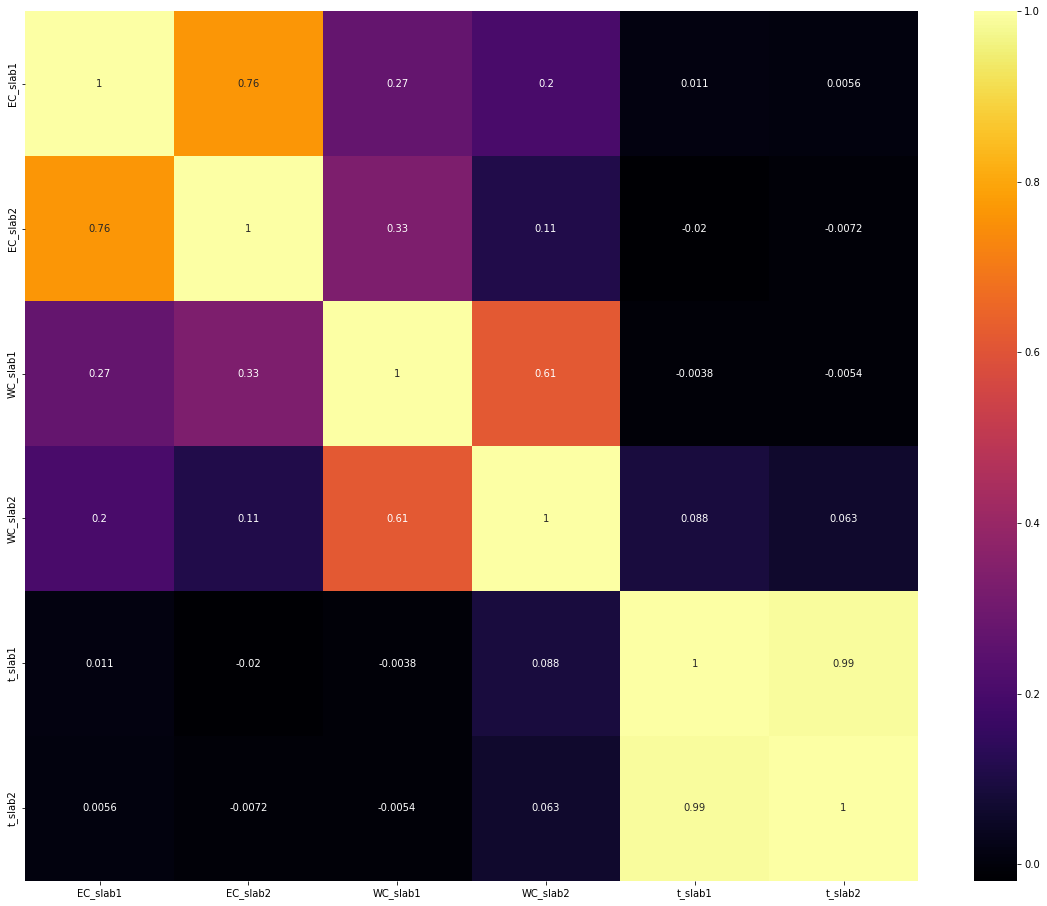

In [448]:
plt.rcParams['figure.figsize'] = [20, 16]
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True,cmap='inferno')
plt.show()

<Figure size 720x432 with 0 Axes>

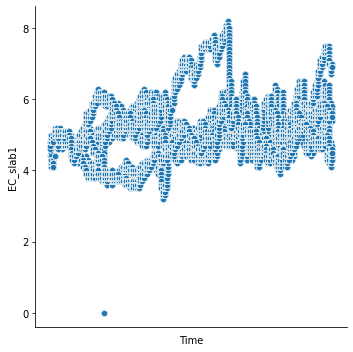

<Figure size 720x432 with 0 Axes>

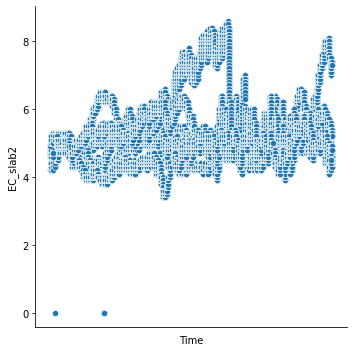

<Figure size 720x432 with 0 Axes>

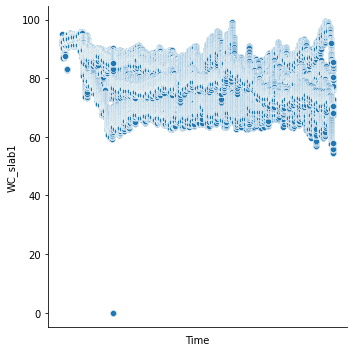

<Figure size 720x432 with 0 Axes>

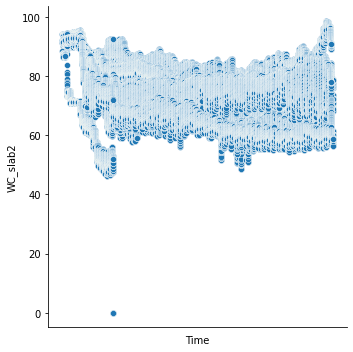

<Figure size 720x432 with 0 Axes>

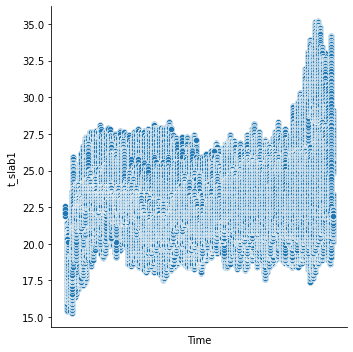

<Figure size 720x432 with 0 Axes>

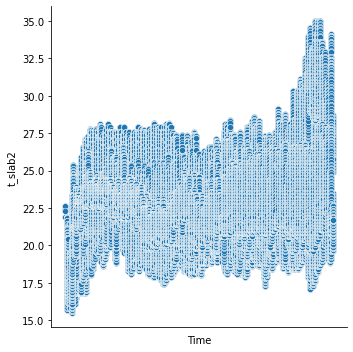

In [449]:
for i in res_grod:
    plt.figure(figsize=(10,6))
    sns.relplot(x='Time',y=i,data=grod_df)

<Figure size 720x432 with 0 Axes>

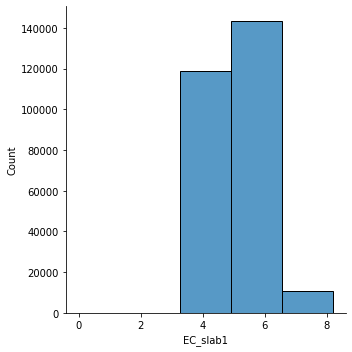

<Figure size 720x432 with 0 Axes>

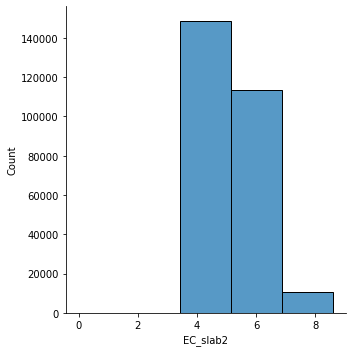

<Figure size 720x432 with 0 Axes>

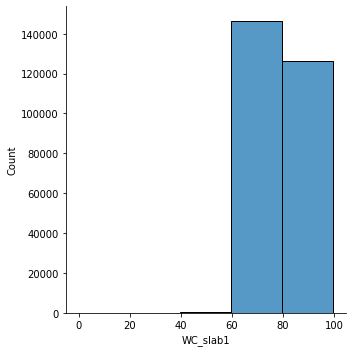

<Figure size 720x432 with 0 Axes>

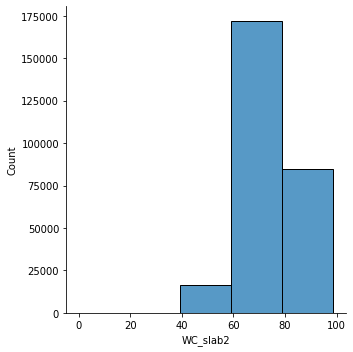

<Figure size 720x432 with 0 Axes>

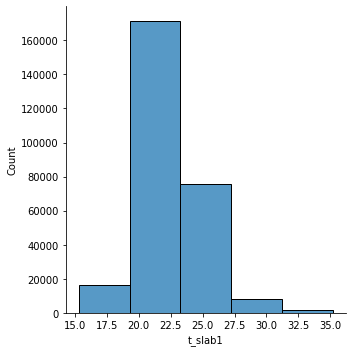

<Figure size 720x432 with 0 Axes>

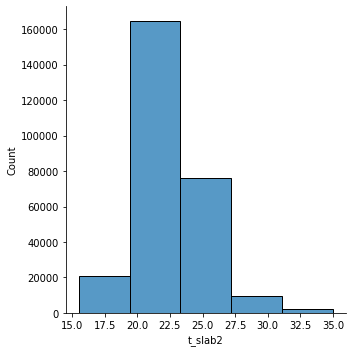

In [450]:
for i in res_grod:
    plt.figure(figsize=(10,6))
    sns.displot(grod_df[i],bins=5)